In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

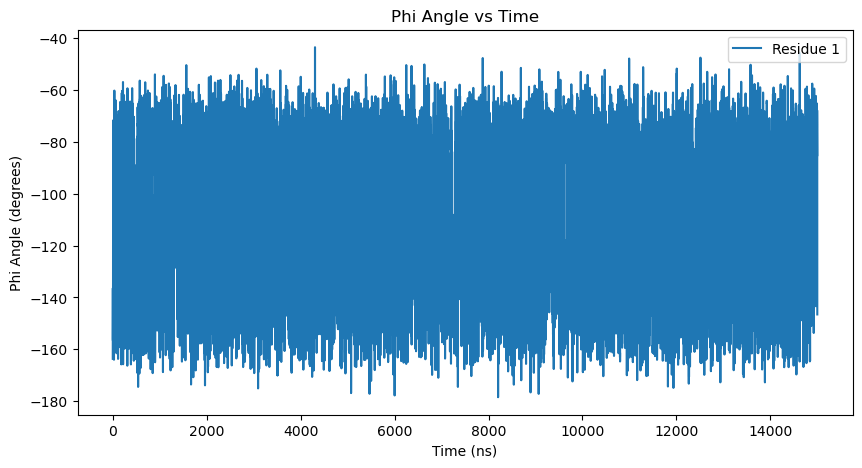

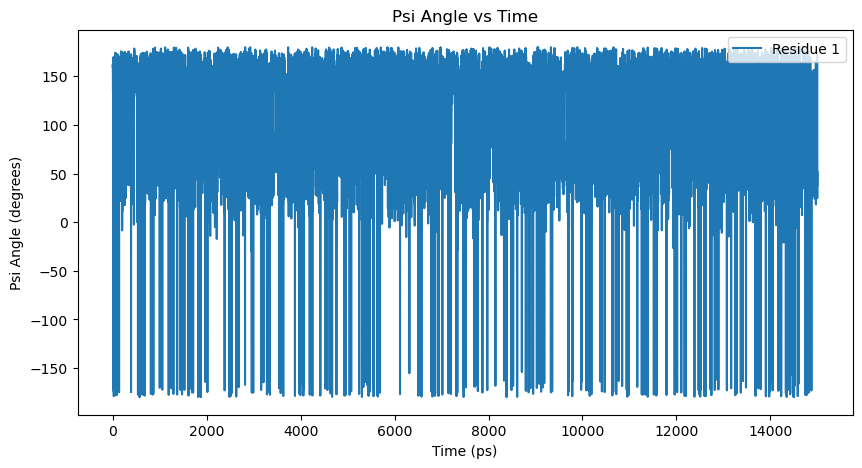

In [2]:

# Load your trajectory data
# Replace 'trajectory.xtc' with the actual trajectory file and 'topology.pdb' with your topology file
traj = md.load('../Inputs/adp_T300.trr', top='../Inputs/adp.gro')

# Compute phi and psi angles for all residues
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Time values (assuming time step = 0.002 ps for each frame)
time = np.arange(traj.n_frames) # * 0.002  # Convert to ns if needed (e.g., 0.002 ps)

# Plot phi angles
plt.figure(figsize=(10, 5))
for i in range(phi_angles.shape[1]):
    plt.plot(time, np.rad2deg(phi_angles[:, i]), label=f'Residue {i + 1}')
plt.xlabel('Time (ns)')
plt.ylabel('Phi Angle (degrees)')
plt.title('Phi Angle vs Time')
plt.legend(loc='upper right')
plt.show()

# Plot psi angles
plt.figure(figsize=(10, 5))
for i in range(psi_angles.shape[1]):
    plt.plot(time, np.rad2deg(psi_angles[:, i]), label=f'Residue {i + 1}')
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle (degrees)')
plt.title('Psi Angle vs Time')
plt.legend(loc='upper right')
plt.show()


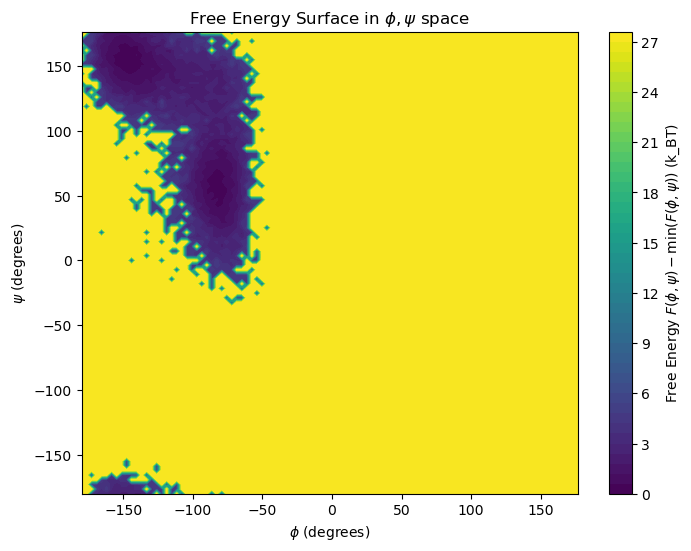

In [3]:
# Load your trajectory data
# Replace 'trajectory.xtc' with the actual trajectory file and 'topology.pdb' with your topology file
traj = md.load('../Inputs/adp_T300.trr', top='../Inputs/adp.gro')

# Compute phi and psi angles for all residues
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles from radians to degrees
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# For simplicity, let's just consider the first residue
phi = phi_angles_deg[:, 0]
psi = psi_angles_deg[:, 0]

# Make a 2D histogram of the phi and psi angles
hist, xedges, yedges = np.histogram2d(phi, psi, bins=100, range=[[-180, 180], [-180, 180]])

# Compute free energy: F(phi, psi) = -log(histogram)
# Add a small value to avoid taking the log of zero
hist += 1e-10
free_energy = -np.log(hist)

# Normalize by subtracting the minimum free energy
free_energy -= np.min(free_energy)

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(xedges[:-1], yedges[:-1], free_energy.T, levels=50, cmap='viridis')
plt.colorbar(label=r'Free Energy $F(\phi, \psi) - \min(F(\phi, \psi))$ (k_BT)')
plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$\psi$ (degrees)')
plt.title('Free Energy Surface in $\phi, \psi$ space')
plt.show()

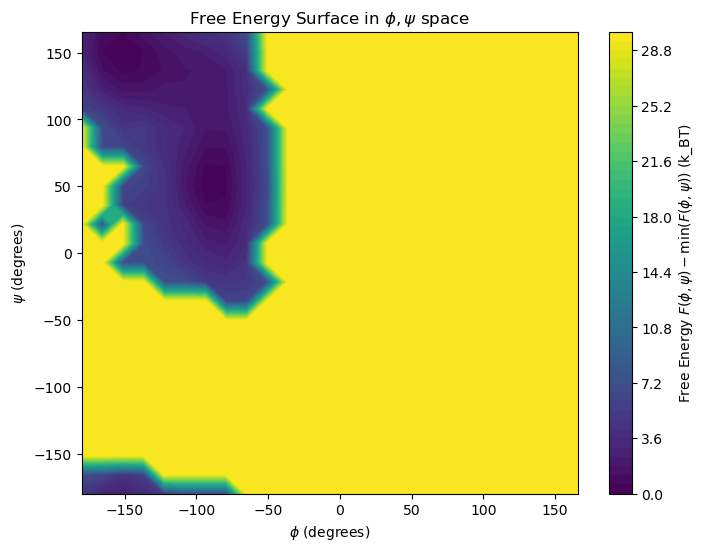

In [4]:
# 25 bins in each direction

# Load your trajectory data
traj = md.load('../Inputs/adp_T300.trr', top='../Inputs/adp.gro')

# Compute phi and psi angles for all residues
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles from radians to degrees
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# Ensure that we only use the angles for the first residue (or choose a specific residue)
phi = phi_angles_deg[:, 0]  # Selecting the first residue's phi angles
psi = psi_angles_deg[:, 0]  # Selecting the first residue's psi angles

# Make a 2D histogram of the phi and psi angles, using 25 bins in both directions
hist, xedges, yedges = np.histogram2d(phi, psi, bins=25, range=[[-180, 180], [-180, 180]])

# Compute free energy: F(phi, psi) = -log(histogram)
# Add a small value to avoid taking the log of zero
hist += 1e-10
free_energy = -np.log(hist)

# Normalize by subtracting the minimum free energy
free_energy -= np.min(free_energy)

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(xedges[:-1], yedges[:-1], free_energy.T, levels=50, cmap='viridis')
plt.colorbar(label=r'Free Energy $F(\phi, \psi) - \min(F(\phi, \psi))$ (k_BT)')
plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel(r'$\psi$ (degrees)')
plt.title('Free Energy Surface in $\phi, \psi$ space')
plt.show()


In [18]:
# FES function
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25):
    """
    Compute the free energy surface (FES) for a given trajectory.
    
    Parameters:
    traj (md.Trajectory): The trajectory loaded by mdtraj.
    bins (int): Number of bins for the 2D histogram.
    
    Returns:
    free_energy (ndarray): The computed free energy surface on a grid.
    x_centers (ndarray): The bin centers for the phi angles.
    y_centers (ndarray): The bin centers for the psi angles.
    """
    # Compute phi and psi angles for all residues
    phi_indices, phi_angles = md.compute_phi(traj)
    psi_indices, psi_angles = md.compute_psi(traj)
    
    # Convert angles from radians to degrees
    phi_angles_deg = np.rad2deg(phi_angles)
    psi_angles_deg = np.rad2deg(psi_angles)
    
    # For simplicity, use the first residue's phi and psi angles
    phi = phi_angles_deg[:, 0]
    psi = psi_angles_deg[:, 0]
    
    # Make a 2D histogram of the phi and psi angles
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins, range=[[-180, 180], [-180, 180]])
    
    # Compute free energy: F(phi, psi) = -log(histogram)
    hist += 1e-10  # Avoid log(0)
    free_energy = -np.log(hist)
    
    # Normalize by subtracting the minimum free energy
    free_energy -= np.min(free_energy)
    
    # Calculate bin centers for plotting
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    
    return free_energy, x_centers, y_centers

def plot_fes(free_energy, x_centers, y_centers, max_free_energy=100):
    """
    Plot the free energy surface using imshow with correct orientation.
    
    Parameters:
    free_energy (ndarray): The computed free energy surface on a grid.
    x_centers (ndarray): The bin centers for the phi angles.
    y_centers (ndarray): The bin centers for the psi angles.
    max_free_energy (float): The maximum free energy for visualization (in kT).
    """
    free_energy = np.clip(free_energy, 0, max_free_energy)  # Cap the free energy at max_free_energy
    
    plt.figure(figsize=(8, 6))
    im = plt.imshow(free_energy.T, extent=[x_centers[0], x_centers[-1], y_centers[0], y_centers[-1]],
                    origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(im, label=r'Free Energy $F(\phi, \psi) - \min(F(\phi, \psi))$ (k_BT)')
    plt.xlabel(r'$\phi$ (degrees)')
    plt.ylabel(r'$\psi$ (degrees)')
    plt.title('Free Energy Surface in $\phi, \psi$ space')
    plt.show()



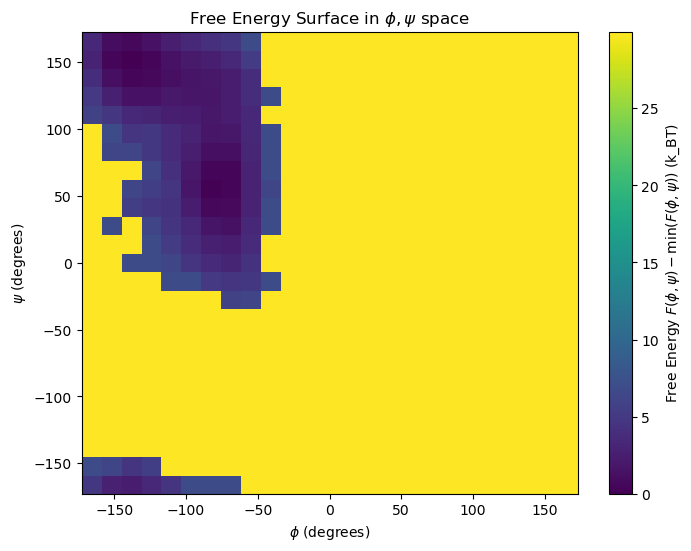

In [19]:
# Example usage of function
traj = md.load('../Inputs/adp_T300.trr', top='../Inputs/adp.gro')
free_energy, x_centers, y_centers = compute_fes(traj, bins=25)
plot_fes(free_energy, x_centers, y_centers)

## Plot for parallel tempering

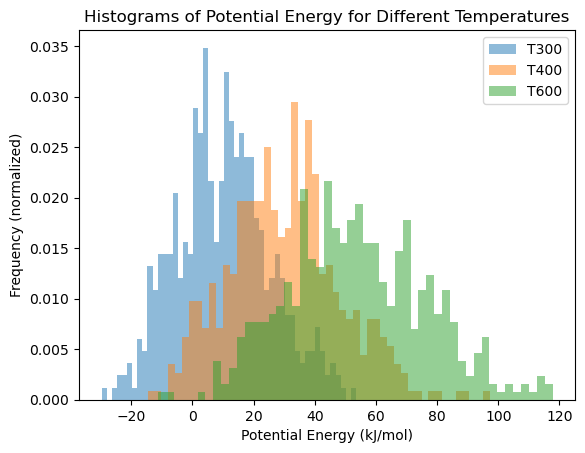

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the potential energy data from each replica
energy_T300 = np.loadtxt('../Inputs/T300/potential_energy_T300.xvg', comments=['@', '#'])
energy_T400 = np.loadtxt('../Inputs/T400/potential_energy_T400.xvg', comments=['@', '#'])
energy_T600 = np.loadtxt('../Inputs/T600/potential_energy_T600.xvg', comments=['@', '#'])

# Extract the potential energy values (second column)
energy_T300_vals = energy_T300[:, 1]
energy_T400_vals = energy_T400[:, 1]
energy_T600_vals = energy_T600[:, 1]

# Plot histograms of potential energy for each temperature
plt.hist(energy_T300_vals, bins=50, alpha=0.5, label='T300', density=True)
plt.hist(energy_T400_vals, bins=50, alpha=0.5, label='T400', density=True)
plt.hist(energy_T600_vals, bins=50, alpha=0.5, label='T600', density=True)

# Add labels and legend
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Frequency (normalized)')
plt.title('Histograms of Potential Energy for Different Temperatures')
plt.legend()

# Show the plot
plt.show()

They do not overlap with each other. As temperature increase, the histogram get flattened.

### Free energy landsacpe for T=300

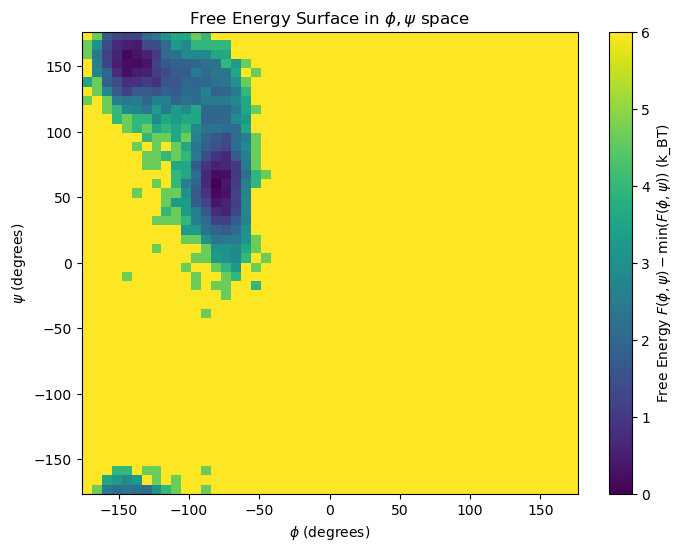

In [26]:
traj_T300 = md.load('../Inputs/T300/adp_exchange3temps.trr', top='../Inputs/T300/adp.gro')

# Compute and plot the FES for T300
free_energy_T300, x_centers_T300, y_centers_T300 = compute_fes(traj_T300, bins=50)
plot_fes(free_energy_T300, x_centers_T300, y_centers_T300, max_free_energy=6)

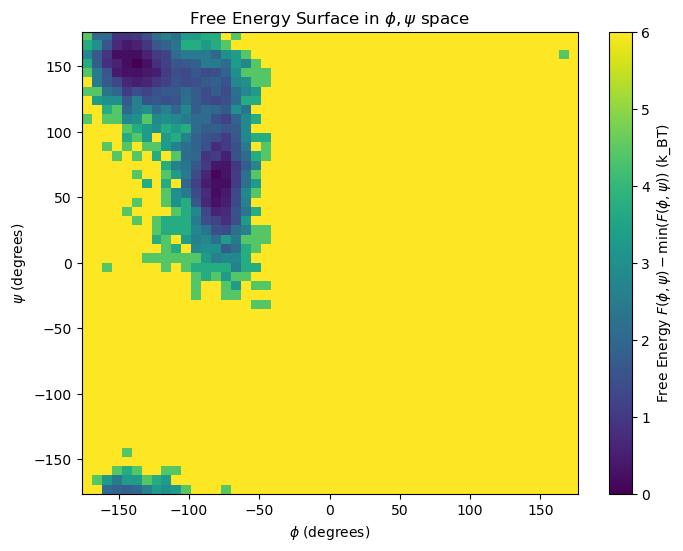

In [27]:
# Load trajectory for T400
traj_T400 = md.load('../Inputs/T400/adp_exchange3temps.trr', top='../Inputs/T400/adp.gro')

# Compute and plot the FES for T400
free_energy_T400, x_centers_T400, y_centers_T400 = compute_fes(traj_T400, bins=50)
plot_fes(free_energy_T400, x_centers_T400, y_centers_T400, max_free_energy=6)


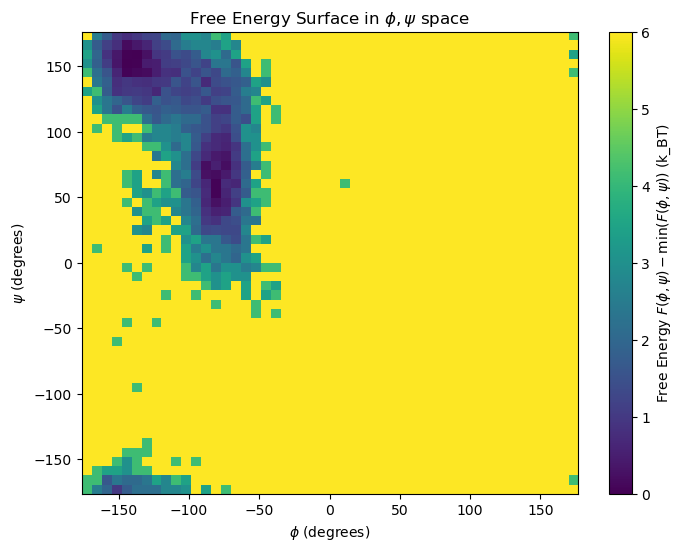

In [28]:
# Load trajectory for T600
traj_T600 = md.load('../Inputs/T600/adp_exchange3temps.trr', top='../Inputs/T600/adp.gro')

# Compute and plot the FES for T600
free_energy_T600, x_centers_T600, y_centers_T600 = compute_fes(traj_T600, bins=50)
plot_fes(free_energy_T600, x_centers_T600, y_centers_T600, max_free_energy=6)

By increase the temperature, the conformational landscape grows into a larger area of the φ-ψ space. This is because the increased temperature provided with more energy to overcome energy barrier.

## Plot temperature exchanges

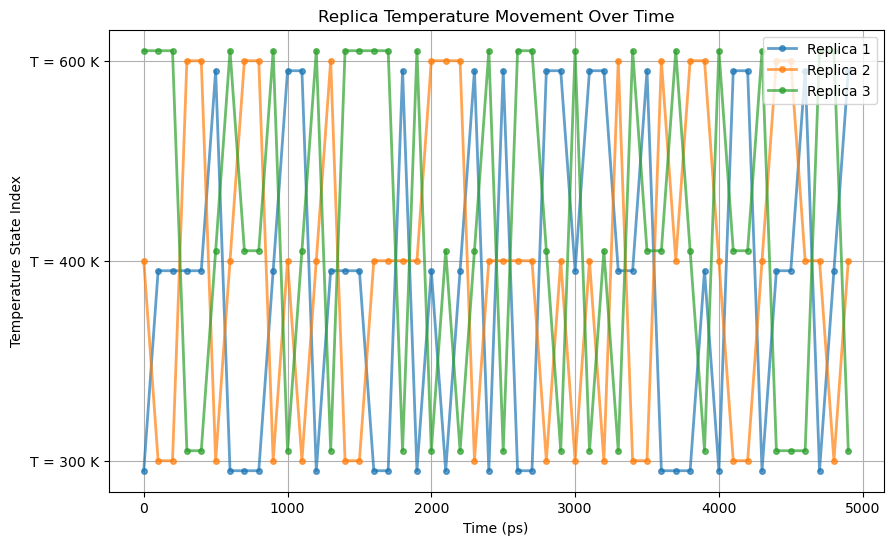

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Load replica temperature data
data = np.loadtxt('../Inputs/T300/replica_temp.xvg')

# Extract time steps and replica states
time_steps = data[:, 0]
replica_states = data[:, 1:]

# Subsample the data (every 100th frame)
subsample_rate = 100
time_steps_subsampled = time_steps[::subsample_rate]
replica_states_subsampled = replica_states[::subsample_rate]

# Plot each replica's temperature state over time with improvements
plt.figure(figsize=(10, 6))

# Define jitter to slightly offset y-values for each replica to reduce overlap
jitter = np.array([-0.05, 0.0, 0.05])

for i in range(replica_states_subsampled.shape[1]):
    plt.plot(time_steps_subsampled, replica_states_subsampled[:, i] + jitter[i], 
             label=f'Replica {i+1}', marker='o', markersize=4, linestyle='-', lw=2, alpha=0.7)

# Customize plot
plt.xlabel('Time (ps)')
plt.ylabel('Temperature State Index')
plt.title('Replica Temperature Movement Over Time')
plt.yticks([0, 1, 2], ['T = 300 K', 'T = 400 K', 'T = 600 K'])  # Map y-ticks to temperatures
plt.grid(True)
plt.legend()

# Show plot
plt.show()
